In [1]:
import lmdb
import numpy as np
import scipy.misc
import random
import matplotlib.pyplot as plt
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import scipy.misc as misc
import os
import scipy.misc as misc

LMDB_PATH = '/home/leoara01/work/PPSS_LMDB_Train'

### Read LMDB file

In [2]:
lst_labels_imgs_read = []
lst_imgs_read = []

print('LMDB file')
env = lmdb.open(LMDB_PATH, readonly=True)

# Iterate file and load items on memory
with env.begin() as txn:
    cursor = txn.cursor()
    for key, value in cursor:
        key_str = key.decode('ascii')
        if 'label' in key_str:
            # Get shape information from key name
            info_key = key_str.split('_')
            # Get image shape [2:None] means from index 2 to the end
            shape_img = tuple(map(lambda x: int(x), info_key[2:None]))
            label_data = np.frombuffer(value, dtype=np.uint8).reshape(shape_img).astype(np.float32)
            label_data = np.expand_dims(label_data, axis=2)
            lst_labels_imgs_read.append(label_data)
        else:
            # Get shape information from key name
            info_key = key_str.split('_')
            # Get image shape [2:None] means from index 2 to the end
            shape_img = tuple(map(lambda x: int(x), info_key[2:None]))
            lst_imgs_read.append(np.frombuffer(value, dtype=np.uint8).reshape(shape_img).astype(np.float32))

LMDB file


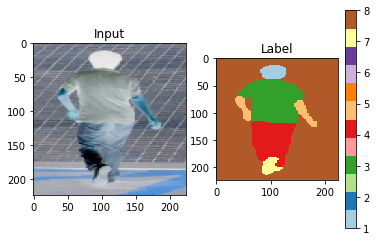

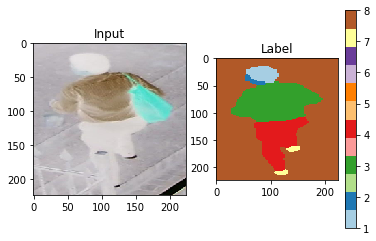

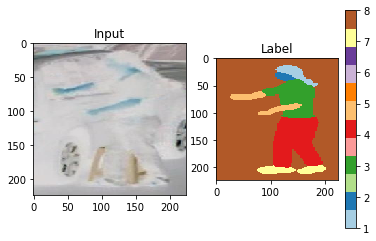

In [3]:
for i in range(0, 3):
    fig = plt.figure()
    a=fig.add_subplot(1,2,1)
    plt.imshow(lst_imgs_read[i])
    a.set_title('Input')
    a=fig.add_subplot(1,2,2)
    plt.imshow(lst_labels_imgs_read[i].reshape(224,224), cmap=cm.Paired ,vmin=1, vmax=8)
    #plt.imshow(lst_labels_imgs_read[0])
    a.set_title('Label')
    plt.colorbar()
    plt.show()